# Redukcja wymiarowości

*Dimensionality reduction*

## SVD


Interpretacja geometryczna mnożenia macierzy

In [1]:
def plot_transform_xa(x,a):
    """
    wizualizacja mnozenia macierzy a * x
    """
    
    print(a)
    y = np.dot(x,a)
    
    plt.figure(figsize=(15,3.4))
    
    plt.subplot(1,4,1)
    
    plt.scatter(x[:,0],x[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,2)
    plt.scatter(y[:,0],y[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,3)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0, 0, 0, 1, head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
 
    plt.subplot(1,4,4)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    
    plt.arrow(0, 0, a[0,0],a[0,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, a[1,0],a[1,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.array([[0, 0],
             [0, 1],
             [0, 2],
             [0, 3],
             [0, 4],
             [0, 5],
             [0.5, 5],
             [1, 5]])
print(x)

[[0.  0. ]
 [0.  1. ]
 [0.  2. ]
 [0.  3. ]
 [0.  4. ]
 [0.  5. ]
 [0.5 5. ]
 [1.  5. ]]


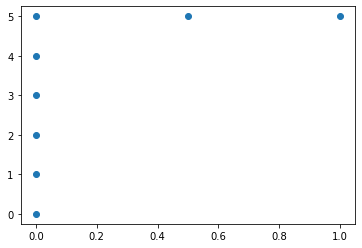

In [4]:
plt.scatter(x[:, 0], x[:, 1])

In [5]:
a = np.diag([4, 4])
a

array([[4, 0],
       [0, 4]])

[[4 0]
 [0 4]]


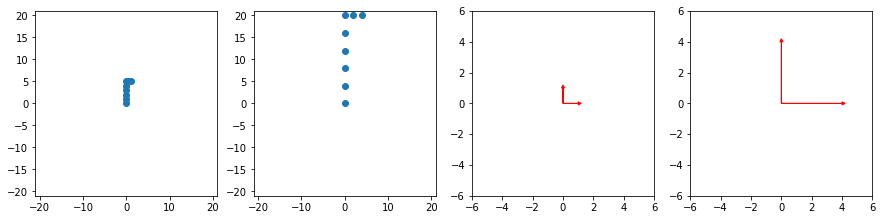

In [6]:
plot_transform_xa(x, a)

Co tu widzimy:

1) Punkty oryginalne

2) Punkty przetworzone

3) Strzałki (wektory) reprezentujące oryginalny układ odniesienia

4) Wektory reprezentujące przetworzony układ odniesienia

[[4 0]
 [0 2]]


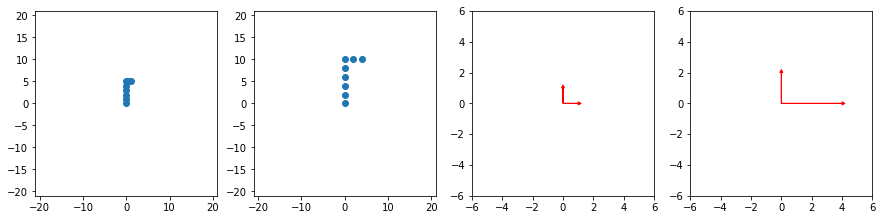

In [7]:












a = np.diag([4, 2])
plot_transform_xa(x, a)

Wniosek: Macierze diagonalne są macierzami **skalującymi**

[[ 2  3]
 [-1  3]]


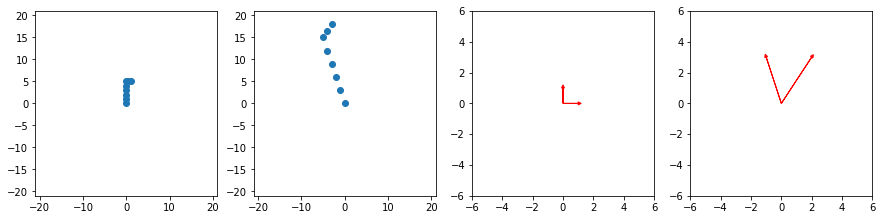

In [8]:
# dla dowlonej macierzy
a = np.array([[2, 3],
             [-1, 3]])
plot_transform_xa(x, a)

[[4 0]
 [0 0]]


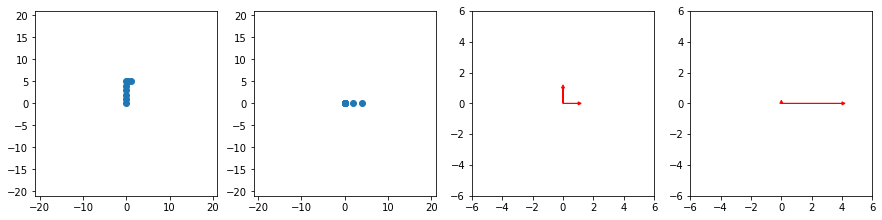

In [9]:
a = np.diag([4, 0])
plot_transform_xa(x, a)

Gdy na diagonali sa wartości zerowe, w praktyce robimy **rzutowanie na podprzetrzeń** - czyli zredukowaliśmy wynmiarowość danych z 2 do 1

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


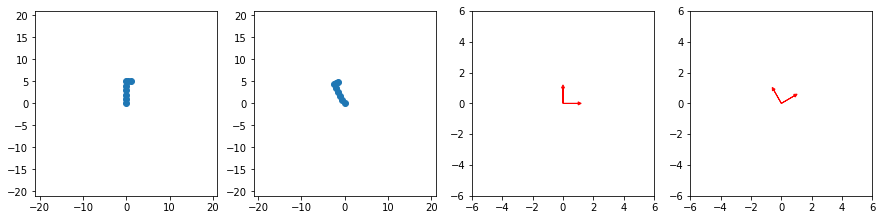

In [10]:
# macierz obrotu
t = -np.pi / 6

a = np.array([[np.cos(t), -np.sin(t)],
             [np.sin(t), np.cos(t)]])
plot_transform_xa(x, a)

Macierz obrotu musi być ortogonalna ( czyli wtedy gdy a * a' = I    oraz    det(a) = 1 )

Co się stanie po połączeniu macierzy diagonalnej z macierzą obrotu (z ich iloczynem)?

[[ 3.46410162  2.        ]
 [-1.          1.73205081]]


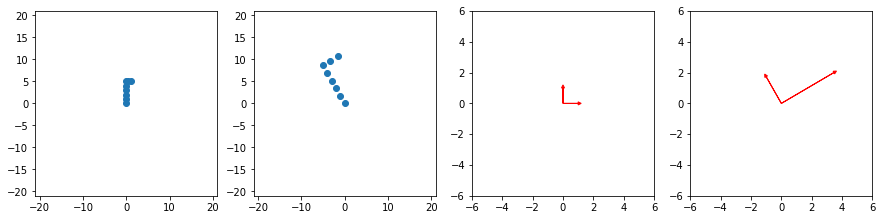

In [11]:
t = -np.pi / 6  # obrót o 30 stopni 

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu 
             [np.sin(t), np.cos(t)]])

s = np.diag([4, 2]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

[[3.46410162 2.        ]
 [0.         0.        ]]


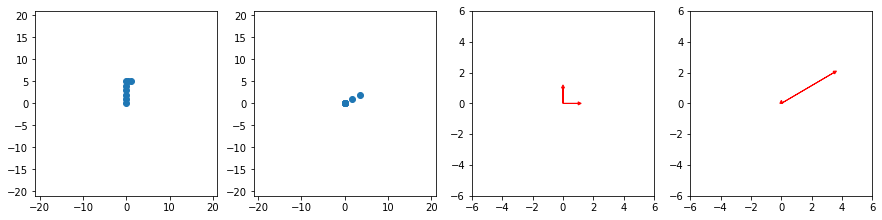

In [12]:
t = -np.pi / 6  # obrót o 30 stopni 

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu 
             [np.sin(t), np.cos(t)]])

s = np.diag([4, 0]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

### Podsumowując:
Mnożenie wektora przez macierz to reprezetnacja tego wektora w innych układzie współrzędnych - czyli inaczej mówiąc zrzutowanie naszych punktów do nowej przestrzeni. 

# Rozkład SVD 

## X - macierz $ m\times n$

rozkładamy macierz na trzy czynniki:


## $ X = U \times \Sigma \times V^t$

, gdzie: $U: m \times m , S: m \times n, V: n \times n $

- U i V - ortogonalne o wyznacznikach 1 (są to macierze zawierające wektory osobliwe). Są to macierze obrotu.
- $\Sigma$ - macierz wartości osobliwych - $diag(\sigma_1, ..., \sigma_k)$ ,  sigmy uporządkowane malejąco. Macierz jest tego samego wymiary co X zawsze (czyli diagonalna, ale prostokątna). Jest to macierz skalująca.

<img src="Grafika/svd.jpg" width="800">

Źródło: https://www.google.pl/search?q=svd&client=ubuntu&hs=LnO&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjI0b_Bj7HUAhUGQJoKHTXtAb8Q_AUICigB#channel=fs&tbm=isch&q=svd+decomposition&imgrc=jIHtm6dIDFPLAM:

## Interpretacja:

## $X^j = (U \Sigma V^t)^j = U \times (\Sigma V^t)^j = U \times \Sigma \times (V^t)^j$ 

czyli $j$-ta kolummna $X$ jest reprezentacją $j$-tej kolumy $(V^t)$, czyli $j$-tego wiersza $V$, gdzie

$X^j$ - cecha, którą obserwujemy, a $(V^t)^j$ to cech ukryta. 

<br>

<br>

<br>

<br>

### Analogicznie:

## $X_i = (U \Sigma V^t)_i = (U \Sigma)_i \times V^t = U_i \times \Sigma \times V^t$

#### Pytanie: po co nam to?

<br>

<br>

#### Odpowiedź:

#### Wartości elementów diagonali macierzy $\Sigma$ mówią o tym, jak ważna jest dana cecha ukryta!

Duża wartosć oznacza, że cecha jest istotna - zawiera dużo informacji. Mała - że nie jest ważna - jest szumem.


<br>

#### Zatem pomysł jest następujący: 

#### Wykorzystajmy do reprezentacji X tylko ważne cechy ukryte.

#### Przykład 1 - dwie silnie skorelowane zmienne

In [13]:
cov = np.array([[1, 0.999, 0],
               [0.999, 1, 0],
               [0, 0, 1]])

X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov, size=20)
X

array([[ 0.66233477,  0.66824787,  2.24054735],
       [-0.12265288, -0.15526753,  1.23908848],
       [-0.89600016, -0.86979934,  0.26993016],
       [-0.97209231, -0.9997033 ,  0.57694278],
       [-0.58912452, -0.56452358, -0.98587167],
       [-0.64702726, -0.65898407,  0.11158802],
       [-0.91039709, -1.05025172,  0.06429666],
       [-0.45068352, -0.49113057,  0.82995113],
       [-0.64250071, -0.69201925, -0.68935828],
       [-0.39300053, -0.36831267,  0.17506099],
       [ 0.00440129, -0.00309949, -0.41262229],
       [-0.57678006, -0.60242359, -0.17181811],
       [-0.04690233, -0.03466106,  0.54399755],
       [ 0.79666025,  0.79903837, -0.78794139],
       [-0.8435095 , -0.80065889, -2.32832825],
       [-0.20692766, -0.19245027, -0.8125144 ],
       [ 1.52789122,  1.51844178,  0.89776967],
       [-2.58865737, -2.57564298, -1.26634646],
       [-0.27231068, -0.32458848, -0.25618731],
       [-0.99022042, -0.95007382,  1.10245381]])

In [14]:
U, s, V = np.linalg.svd(X, full_matrices=True)

In [15]:
S = np.zeros_like(X)
np.fill_diagonal(S, s)
S

array([[6.10503421, 0.        , 0.        ],
       [0.        , 3.96133022, 0.        ],
       [0.        , 0.        , 0.12840616],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [16]:
U.shape, V.shape

((20, 20), (3, 3))

In [17]:
np.matmul(np.matmul(U, S), V) # Odtworzenie pierwotnego X

array([[ 0.66233477,  0.66824787,  2.24054735],
       [-0.12265288, -0.15526753,  1.23908848],
       [-0.89600016, -0.86979934,  0.26993016],
       [-0.97209231, -0.9997033 ,  0.57694278],
       [-0.58912452, -0.56452358, -0.98587167],
       [-0.64702726, -0.65898407,  0.11158802],
       [-0.91039709, -1.05025172,  0.06429666],
       [-0.45068352, -0.49113057,  0.82995113],
       [-0.64250071, -0.69201925, -0.68935828],
       [-0.39300053, -0.36831267,  0.17506099],
       [ 0.00440129, -0.00309949, -0.41262229],
       [-0.57678006, -0.60242359, -0.17181811],
       [-0.04690233, -0.03466106,  0.54399755],
       [ 0.79666025,  0.79903837, -0.78794139],
       [-0.8435095 , -0.80065889, -2.32832825],
       [-0.20692766, -0.19245027, -0.8125144 ],
       [ 1.52789122,  1.51844178,  0.89776967],
       [-2.58865737, -2.57564298, -1.26634646],
       [-0.27231068, -0.32458848, -0.25618731],
       [-0.99022042, -0.95007382,  1.10245381]])

In [18]:
X

array([[ 0.66233477,  0.66824787,  2.24054735],
       [-0.12265288, -0.15526753,  1.23908848],
       [-0.89600016, -0.86979934,  0.26993016],
       [-0.97209231, -0.9997033 ,  0.57694278],
       [-0.58912452, -0.56452358, -0.98587167],
       [-0.64702726, -0.65898407,  0.11158802],
       [-0.91039709, -1.05025172,  0.06429666],
       [-0.45068352, -0.49113057,  0.82995113],
       [-0.64250071, -0.69201925, -0.68935828],
       [-0.39300053, -0.36831267,  0.17506099],
       [ 0.00440129, -0.00309949, -0.41262229],
       [-0.57678006, -0.60242359, -0.17181811],
       [-0.04690233, -0.03466106,  0.54399755],
       [ 0.79666025,  0.79903837, -0.78794139],
       [-0.8435095 , -0.80065889, -2.32832825],
       [-0.20692766, -0.19245027, -0.8125144 ],
       [ 1.52789122,  1.51844178,  0.89776967],
       [-2.58865737, -2.57564298, -1.26634646],
       [-0.27231068, -0.32458848, -0.25618731],
       [-0.99022042, -0.95007382,  1.10245381]])

Przeanalizujmy wartości na diagonali

In [19]:
S # widzimy, że ostatnia wartość znacznie odstaje od pozostałych, więc ją zerujemy jako nieistotną

array([[6.10503421, 0.        , 0.        ],
       [0.        , 3.96133022, 0.        ],
       [0.        , 0.        , 0.12840616],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [20]:
S[2, 2] = 0 
S

array([[6.10503421, 0.        , 0.        ],
       [0.        , 3.96133022, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [21]:
np.matmul(np.matmul(U, S), V) # Odtworzenie przybliżonego X

array([[ 6.72830376e-01,  6.57847842e-01,  2.24044910e+00],
       [-1.32542832e-01, -1.45467634e-01,  1.23918106e+00],
       [-8.77509176e-01, -8.88121940e-01,  2.69757063e-01],
       [-9.78705229e-01, -9.93150601e-01,  5.77004684e-01],
       [-5.78774745e-01, -5.74779104e-01, -9.85968556e-01],
       [-6.49505261e-01, -6.56528637e-01,  1.11611218e-01],
       [-9.75831778e-01, -9.85412900e-01,  6.49092060e-02],
       [-4.64914588e-01, -4.77029095e-01,  8.30084353e-01],
       [-6.67561762e-01, -6.67186414e-01, -6.89123685e-01],
       [-3.78025132e-01, -3.83151694e-01,  1.74920802e-01],
       [-1.31788452e-03,  2.56760321e-03, -4.12568753e-01],
       [-5.87762166e-01, -5.91541493e-01, -1.71715301e-01],
       [-3.79973274e-02, -4.34849629e-02,  5.43914191e-01],
       [ 7.90467279e-01,  8.05174944e-01, -7.87883414e-01],
       [-8.29207524e-01, -8.14830627e-01, -2.32846213e+00],
       [-2.02576477e-01, -1.96761829e-01, -8.12555128e-01],
       [ 1.52038715e+00,  1.52587752e+00

In [22]:
X

array([[ 0.66233477,  0.66824787,  2.24054735],
       [-0.12265288, -0.15526753,  1.23908848],
       [-0.89600016, -0.86979934,  0.26993016],
       [-0.97209231, -0.9997033 ,  0.57694278],
       [-0.58912452, -0.56452358, -0.98587167],
       [-0.64702726, -0.65898407,  0.11158802],
       [-0.91039709, -1.05025172,  0.06429666],
       [-0.45068352, -0.49113057,  0.82995113],
       [-0.64250071, -0.69201925, -0.68935828],
       [-0.39300053, -0.36831267,  0.17506099],
       [ 0.00440129, -0.00309949, -0.41262229],
       [-0.57678006, -0.60242359, -0.17181811],
       [-0.04690233, -0.03466106,  0.54399755],
       [ 0.79666025,  0.79903837, -0.78794139],
       [-0.8435095 , -0.80065889, -2.32832825],
       [-0.20692766, -0.19245027, -0.8125144 ],
       [ 1.52789122,  1.51844178,  0.89776967],
       [-2.58865737, -2.57564298, -1.26634646],
       [-0.27231068, -0.32458848, -0.25618731],
       [-0.99022042, -0.95007382,  1.10245381]])

In [23]:
np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :]) # Odtworzenie przybliżonego X w optymalny sposób

array([[ 6.72830376e-01,  6.57847842e-01,  2.24044910e+00],
       [-1.32542832e-01, -1.45467634e-01,  1.23918106e+00],
       [-8.77509176e-01, -8.88121940e-01,  2.69757063e-01],
       [-9.78705229e-01, -9.93150601e-01,  5.77004684e-01],
       [-5.78774745e-01, -5.74779104e-01, -9.85968556e-01],
       [-6.49505261e-01, -6.56528637e-01,  1.11611218e-01],
       [-9.75831778e-01, -9.85412900e-01,  6.49092060e-02],
       [-4.64914588e-01, -4.77029095e-01,  8.30084353e-01],
       [-6.67561762e-01, -6.67186414e-01, -6.89123685e-01],
       [-3.78025132e-01, -3.83151694e-01,  1.74920802e-01],
       [-1.31788452e-03,  2.56760321e-03, -4.12568753e-01],
       [-5.87762166e-01, -5.91541493e-01, -1.71715301e-01],
       [-3.79973274e-02, -4.34849629e-02,  5.43914191e-01],
       [ 7.90467279e-01,  8.05174944e-01, -7.87883414e-01],
       [-8.29207524e-01, -8.14830627e-01, -2.32846213e+00],
       [-2.02576477e-01, -1.96761829e-01, -8.12555128e-01],
       [ 1.52038715e+00,  1.52587752e+00

#### Przykład 2 - zmienne liniowo zależne

In [24]:
a = np.arange(1, 301).reshape((50, 6))
a # orygunalne informacje

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 13,  14,  15,  16,  17,  18],
       [ 19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42],
       [ 43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120],
       [121, 122, 123, 124, 125, 126],
       [127, 128, 129, 130, 131, 132],
       [133, 134, 135, 136, 137, 138],
       [139, 140, 141, 142, 143, 144],
       [145, 146, 147, 148, 149, 150],
       [151, 152, 153, 15

In [25]:
b = np.random.multivariate_normal([0]*15, np.diag([0.1]*15), 6)
# losujemy macierz współczynników liniowych do stwrozenie 15 liniowych kobinacji oryginalnych danych
b

array([[ 0.28140951,  0.01224126,  0.23418217, -0.08926733,  0.16780808,
        -0.32561969,  0.47728675,  0.13867712,  0.15853013, -0.23010844,
        -0.80083587, -0.38118857,  0.40251107,  0.18316787, -0.4388369 ],
       [-0.18552062,  0.03043223,  0.10741787, -0.11412701, -0.50205364,
        -0.01302642, -0.31822465,  0.4400312 , -0.08356532,  0.10032518,
         0.19479956,  0.05994242, -0.18906445, -0.27722607, -0.61545939],
       [-0.12126095, -0.42734955,  0.15234399,  0.00859374, -0.28359134,
         0.26108472,  0.02536283, -0.36647269, -0.12796528, -0.76357384,
        -0.0092697 ,  0.50749557, -0.25174302, -0.47309332, -0.38419237],
       [-0.31623395,  0.25694472, -0.08251061, -0.00763854,  0.0789475 ,
         0.69313556,  0.51073251,  0.01327526,  0.36273077,  0.15849917,
        -0.21658289, -0.31643165,  0.27216918,  0.47032148,  0.415715  ],
       [ 0.04314348, -0.36014946, -0.54477556, -0.26012227, -0.31875084,
         0.00284891, -0.03177391, -0.00833645, 

In [26]:
x = np.matmul(a, b)
x.shape

(50, 15)

In [27]:
np.set_printoptions(2, suppress=True)

In [28]:
b

array([[ 0.28,  0.01,  0.23, -0.09,  0.17, -0.33,  0.48,  0.14,  0.16,
        -0.23, -0.8 , -0.38,  0.4 ,  0.18, -0.44],
       [-0.19,  0.03,  0.11, -0.11, -0.5 , -0.01, -0.32,  0.44, -0.08,
         0.1 ,  0.19,  0.06, -0.19, -0.28, -0.62],
       [-0.12, -0.43,  0.15,  0.01, -0.28,  0.26,  0.03, -0.37, -0.13,
        -0.76, -0.01,  0.51, -0.25, -0.47, -0.38],
       [-0.32,  0.26, -0.08, -0.01,  0.08,  0.69,  0.51,  0.01,  0.36,
         0.16, -0.22, -0.32,  0.27,  0.47,  0.42],
       [ 0.04, -0.36, -0.54, -0.26, -0.32,  0.  , -0.03, -0.01,  0.61,
        -0.06, -0.11,  0.17,  0.28,  0.3 , -0.16],
       [-0.31, -0.31,  0.42, -0.17, -0.19,  0.48,  0.1 , -0.07,  0.36,
         0.24,  0.16, -0.28,  0.  , -0.26,  0.1 ]])

In [29]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S, s)

In [30]:
s

array([3568.61,   17.15,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ])

In [31]:
x_restored = np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :])

In [32]:
x_restored

array([[  -3.35,   -3.86,    0.39,   -2.65,   -4.1 ,    6.09,    2.38,
          -0.48,    6.24,   -0.52,   -0.91,   -0.82,    1.76,    0.03,
          -1.35],
       [  -6.99,   -8.66,    2.12,   -6.46,  -10.39,   12.67,    6.94,
           0.41,   13.89,   -3.82,   -5.62,   -2.25,    4.85,   -0.31,
          -7.84],
       [ -10.63,  -13.46,    3.86,  -10.27,  -16.67,   19.25,   11.5 ,
           1.3 ,   21.54,   -7.12,  -10.33,   -3.68,    7.94,   -0.66,
         -14.33],
       [ -14.27,  -18.26,    5.6 ,  -14.08,  -22.95,   25.83,   16.07,
           2.18,   29.19,  -10.42,  -15.04,   -5.11,   11.02,   -1.  ,
         -20.82],
       [ -17.9 ,  -23.06,    7.33,  -17.88,  -29.23,   32.41,   20.63,
           3.07,   36.84,  -13.72,  -19.75,   -6.54,   14.11,   -1.34,
         -27.31],
       [ -21.54,  -27.86,    9.07,  -21.69,  -35.52,   38.99,   25.19,
           3.96,   44.49,  -17.02,  -24.46,   -7.97,   17.19,   -1.69,
         -33.79],
       [ -25.18,  -32.66,   10.8 ,  -25.

In [33]:
x

array([[  -3.35,   -3.86,    0.39,   -2.65,   -4.1 ,    6.09,    2.38,
          -0.48,    6.24,   -0.52,   -0.91,   -0.82,    1.76,    0.03,
          -1.35],
       [  -6.99,   -8.66,    2.12,   -6.46,  -10.39,   12.67,    6.94,
           0.41,   13.89,   -3.82,   -5.62,   -2.25,    4.85,   -0.31,
          -7.84],
       [ -10.63,  -13.46,    3.86,  -10.27,  -16.67,   19.25,   11.5 ,
           1.3 ,   21.54,   -7.12,  -10.33,   -3.68,    7.94,   -0.66,
         -14.33],
       [ -14.27,  -18.26,    5.6 ,  -14.08,  -22.95,   25.83,   16.07,
           2.18,   29.19,  -10.42,  -15.04,   -5.11,   11.02,   -1.  ,
         -20.82],
       [ -17.9 ,  -23.06,    7.33,  -17.88,  -29.23,   32.41,   20.63,
           3.07,   36.84,  -13.72,  -19.75,   -6.54,   14.11,   -1.34,
         -27.31],
       [ -21.54,  -27.86,    9.07,  -21.69,  -35.52,   38.99,   25.19,
           3.96,   44.49,  -17.02,  -24.46,   -7.97,   17.19,   -1.69,
         -33.79],
       [ -25.18,  -32.66,   10.8 ,  -25.

Wniosek: za pomocą 2 zmiennych bezstratnie odtwrozyliśmy cały zbiór składający się z 15 zmiennych

#### Przykład 3 - zmienne niezależne z dodanym szumem

In [34]:
a = np.random.multivariate_normal(mean=[0]*6, cov=np.diag([0.1]*6), size=100)
b = np.random.multivariate_normal([0]*15, np.diag([0.4]*15), 6)
noise = np.random.multivariate_normal([0]*15, np.diag([0.01]*15), 100)
X = np.matmul(a, b) + noise
X.shape

(100, 15)

In [35]:
U, s, V = np.linalg.svd(X)
S = np.zeros_like(X)
np.fill_diagonal(S, s)

<BarContainer object of 15 artists>

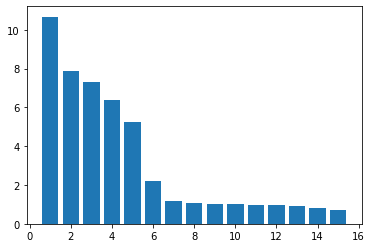

In [36]:
plt.bar(range(1, len(s)+1), s)

<BarContainer object of 15 artists>

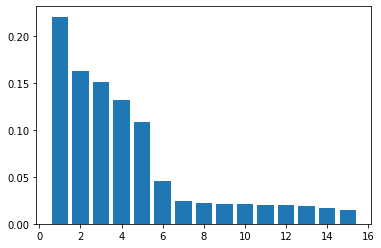

In [37]:
s_norm = s / sum(s)
plt.bar(range(1, len(s_norm)+1), s_norm)

<BarContainer object of 15 artists>

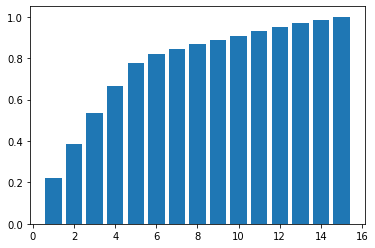

In [38]:
plt.bar(range(1, len(s_norm)+1), np.cumsum(s_norm))

Obserwujmy wyraźne odcięcie 6 pierwszysch zmiennych od reszty (nieskopresowany szum). W takim przypadku bierzemy pierwsze 6 zmiennych i na ich podstawie możemy odbudować przybliżony dataset. 

Dla wartości skumulowanych widać, że dla 6 zmiennych zatrzymujemy około 80% informacji oryginalnych

In [39]:
X_restored = np.matmul(np.matmul(U[:, :6], S[:6, :6]), V[:6, :])
X_restored

array([[-0.8 ,  0.81, -0.1 , ...,  0.26, -0.12,  0.11],
       [ 0.19,  0.67, -0.21, ...,  0.35, -0.87, -0.38],
       [-0.62,  0.01,  0.32, ..., -0.19,  0.18, -0.26],
       ...,
       [ 0.13,  0.49, -0.14, ...,  0.36, -0.06, -0.28],
       [-0.36,  0.9 ,  0.07, ...,  0.26, -0.4 , -0.67],
       [ 0.1 ,  0.73, -0.16, ...,  0.32, -0.52, -0.26]])

In [40]:
np.matmul(a, b)

array([[-0.75,  0.81, -0.12, ...,  0.19, -0.13,  0.06],
       [ 0.36,  0.65, -0.26, ...,  0.33, -0.86, -0.37],
       [-0.63,  0.07,  0.38, ..., -0.21,  0.2 , -0.28],
       ...,
       [ 0.25,  0.49, -0.19, ...,  0.42, -0.11, -0.3 ],
       [-0.26,  0.83,  0.04, ...,  0.24, -0.41, -0.56],
       [-0.  ,  0.72, -0.15, ...,  0.25, -0.43, -0.18]])

In [41]:
U[:, :6]

array([[ 0.08, -0.1 ,  0.07, -0.09, -0.05,  0.27],
       [ 0.19,  0.  , -0.01,  0.01,  0.01,  0.07],
       [-0.08, -0.04, -0.19, -0.21,  0.09,  0.1 ],
       [-0.18,  0.16,  0.02, -0.17,  0.01, -0.  ],
       [-0.08, -0.11, -0.06,  0.02,  0.03,  0.08],
       [-0.07, -0.13,  0.01, -0.02, -0.03,  0.17],
       [-0.03, -0.2 , -0.02,  0.05,  0.04,  0.05],
       [ 0.1 , -0.1 ,  0.09, -0.05, -0.05,  0.15],
       [ 0.12, -0.08,  0.01,  0.05, -0.04,  0.08],
       [-0.11,  0.03,  0.01,  0.01, -0.3 , -0.15],
       [-0.  ,  0.12,  0.09, -0.23, -0.13,  0.07],
       [ 0.09,  0.09, -0.1 ,  0.08,  0.32,  0.15],
       [ 0.04,  0.14,  0.02, -0.16,  0.04,  0.06],
       [ 0.13,  0.04,  0.17, -0.02, -0.01, -0.05],
       [ 0.18, -0.24,  0.11,  0.02,  0.04,  0.09],
       [-0.18,  0.03,  0.21,  0.08,  0.  ,  0.13],
       [ 0.02, -0.03, -0.12,  0.07, -0.1 ,  0.12],
       [-0.05,  0.05,  0.03, -0.04,  0.06,  0.18],
       [ 0.02, -0.  , -0.08,  0.1 , -0.  , -0.07],
       [ 0.06, -0.07,  0.13, -0

# Przetwarzanie obrazu

http://www.ams.org/samplings/feature-column/fcarc-svd

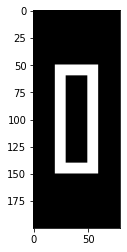

In [42]:
x = np.zeros((200, 80))
x[50:150, 20:60] = 1
x[60:140, 30:50] = 0
plt.imshow(x, cmap='gray')

In [43]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
# zaszumiamy obraz

# losujemy indeksy pixeli
random_indices = np.random.choice([0, 1], size=x.shape).nonzero()

x[random_indices] = x[random_indices] + np.random.normal(0, 0.3, len(random_indices[0]))

# normalizacja obrazka
x[x<0] = 0
x[x>1] = 1

x

array([[0.  , 0.  , 0.18, ..., 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.42, ..., 0.  , 0.  , 0.11],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.3 ],
       [0.  , 0.  , 0.12, ..., 0.  , 0.  , 0.39],
       [0.  , 0.  , 0.17, ..., 0.  , 0.  , 0.21]])

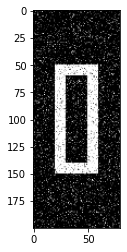

In [45]:
plt.imshow(x, cmap='gray')

### Zadanie: odszumić obrazek

In [46]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S, s)

<BarContainer object of 80 artists>

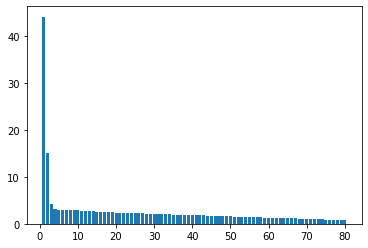

In [47]:
plt.bar(range(1, len(s)+1), s)

Zobaczmy jak będą wyglądały obrazki dla różnych ilości zmiennych ukrytych

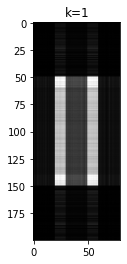

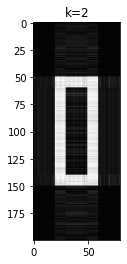

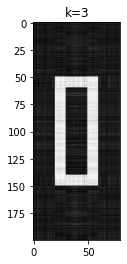

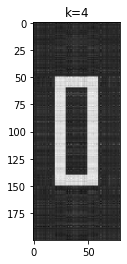

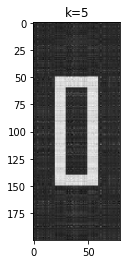

In [48]:
for k in range(1, 6):
    x_restored = np.matmul(np.matmul(U[:, :k], S[:k, :k]), V[:k, :])
    plt.figure()
    plt.imshow(x_restored, cmap='gray')
    plt.title(f"k={k}")

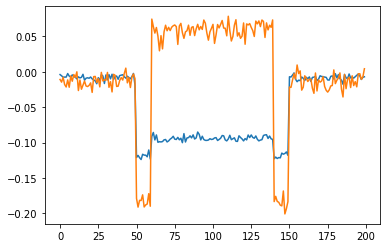

In [49]:
plt.plot(U[:, :2])

In [50]:
# dla k=3

U[:, :3].shape, V[:3, :].shape, S[:3, :3].shape

((200, 3), (3, 80), (3, 3))

In [51]:
# potrzebujemy 849 wartości w tablicach

In [52]:
x.shape

(200, 80)

In [53]:
200 * 80 / 849 # 18-krotnie zmniejszyliśmy rozmiar obrazka

18.84570082449941

### Zadanie - zredukować reprezentację obrazka kolorowego

Zadanie dodatkowe - podać ile bajtów zajmuje normalna reprezentacja, a ile reprezentacja zredukowana dobrej jakości

In [54]:
import PIL.Image as Image

In [55]:
im = Image.open('Dane/Obrazy/1.jpg')

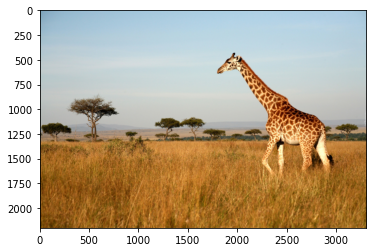

In [56]:
plt.imshow(im)

In [57]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [58]:
im = np.array(im) / 255

In [59]:
im.shape # 3 wymiary bo kanały R G B

(2200, 3300, 3)

In [60]:
type(im)

numpy.ndarray

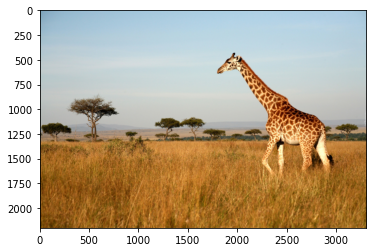

In [61]:
plt.imshow(im)

In [62]:
im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

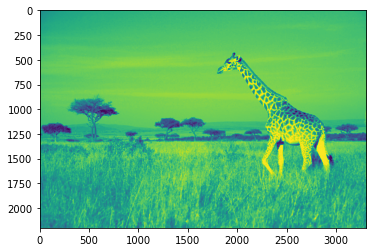

In [63]:
plt.imshow(im_r)

In [64]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

(-10.0, 50.0)

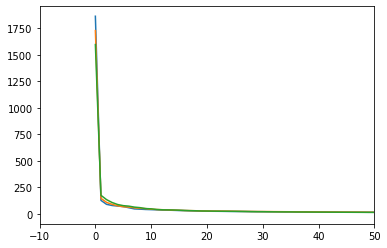

In [65]:
plt.plot(s_r)
plt.plot(s_g)
plt.plot(s_b)
plt.xlim(-10, 50)

(-10.0, 2308.95)

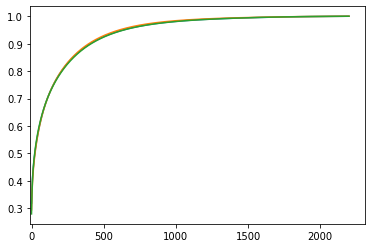

In [66]:
s_r_n = s_r / sum(s_r)
s_g_n = s_g / sum(s_g)
s_b_n = s_b / sum(s_b)


plt.plot(np.cumsum(s_r_n))
plt.plot(np.cumsum(s_g_n))
plt.plot(np.cumsum(s_b_n))
plt.xlim(-10)

In [67]:
k = 800

In [68]:
im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k])), V_r[:k, :])
im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k])), V_g[:k, :])
im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k])), V_b[:k, :])

In [69]:
im_r_restored = np.clip(im_r_restored, 0, 1)
im_g_restored = np.clip(im_g_restored, 0, 1)
im_b_restored = np.clip(im_b_restored, 0, 1)

In [70]:
im_restored = np.zeros_like(im)
im_restored.shape

(2200, 3300, 3)

In [71]:
im_restored[:, :, 0] = im_r_restored
im_restored[:, :, 1] = im_g_restored
im_restored[:, :, 2] = im_b_restored

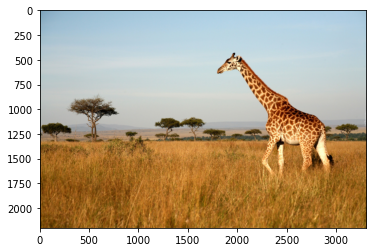

In [72]:
plt.imshow(im_restored)

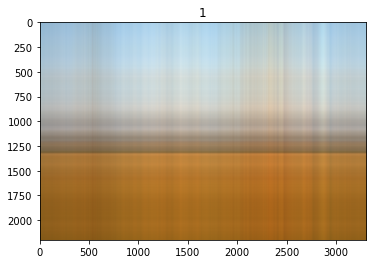

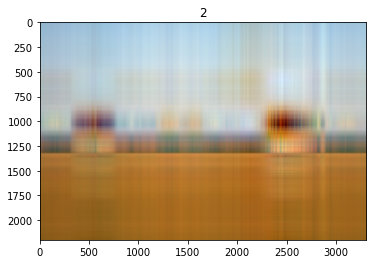

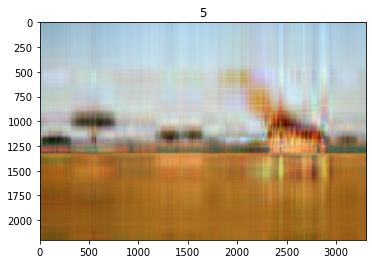

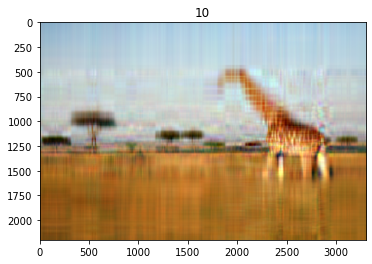

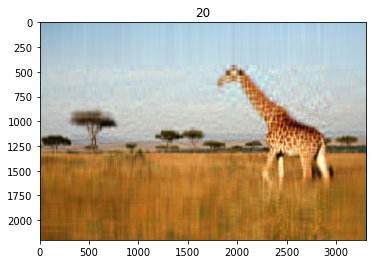

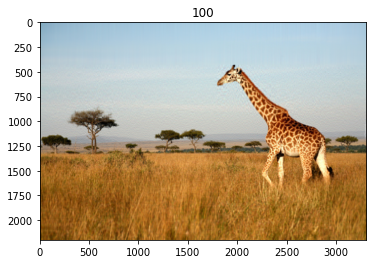

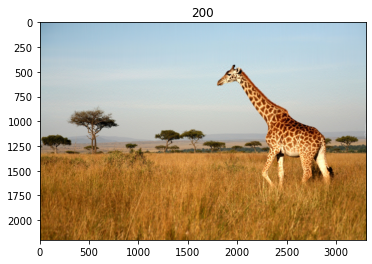

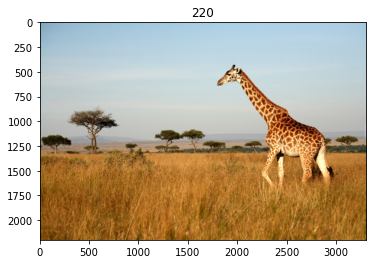

In [78]:
for k in [1, 2, 5, 10, 20, 100, 200, 220]:
    im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k])), V_r[:k, :])
    im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k])), V_g[:k, :])
    im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k])), V_b[:k, :])
    
    im_r_restored = np.clip(im_r_restored, 0, 1)
    im_g_restored = np.clip(im_g_restored, 0, 1)
    im_b_restored = np.clip(im_b_restored, 0, 1)
    
    im_restored = np.zeros_like(im)
    im_restored[:, :, 0] = im_r_restored
    im_restored[:, :, 1] = im_g_restored
    im_restored[:, :, 2] = im_b_restored
    
    plt.figure()
    plt.imshow(im_restored)
    plt.title(k)

In [87]:
k = 220

In [88]:
3 * (U_r[:, :k].shape[0]*U_r[:, :k].shape[1]  + sum(s_r[:k].shape) + (V_r[:k, :].shape[0] * V_r[:k, :].shape[1]))

3630660

In [89]:
im.shape[0] * im.shape[1] * im.shape[2]

21780000

In [90]:
21780000 / 13202400

1.649700054535539

# Case study 

### Zaprojektować wyszukiwarkę: dla danego zapytania znaleźć tekst najbardziej adekwatny.

Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych... 

Dlatego potrzebna redukcja. Pomysł: wykryć znaczenie tekstu znajdując ukryte cechy.

W praktyce rozkład SVD stosuje się w analizie podobieństwa tekstów (wyszukiwarki, systemy rekomendacyjne).

In [91]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(documents)

In [93]:
x = dtm.todense().A.T  # transponujemy, aby mieć słowa jako wirsze, a dokumenty jako kolumny
x

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

### Nasz cel - wyreprezentować dokumenty w niżej wymiarowej przestrzeni - znaleźć ich znaczenie.

Spojrzmy na wyglad dokumentow w powyzszej przestrzeni cech ukrytych

In [94]:
U, s, V = np.linalg.svd(x)

In [95]:
U

array([[ 0.  ,  0.28, -0.  , -0.72,  0.  ,  0.  , -0.  ,  0.45, -0.44],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  ,  0.  , -0.  ,  0.72,  0.29],
       [-0.35, -0.  , -0.34, -0.  , -0.76,  0.15,  0.39,  0.  , -0.  ],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  , -0.  , -0.  , -0.26, -0.73],
       [-0.44,  0.  ,  0.55,  0.  , -0.31,  0.23, -0.6 , -0.  ,  0.  ],
       [ 0.  ,  0.72, -0.  , -0.28,  0.  , -0.  , -0.  , -0.45,  0.44],
       [-0.55, -0.  , -0.27,  0.  ,  0.12, -0.76, -0.2 ,  0.  ,  0.  ],
       [-0.32, -0.  , -0.59,  0.  ,  0.38,  0.57, -0.28, -0.  ,  0.  ],
       [-0.53,  0.  ,  0.41,  0.  ,  0.4 ,  0.15,  0.61,  0.  , -0.  ]])

In [96]:
V

array([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53],
       [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53, -0.  , -0.  ],
       [-0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.53, -0.85],
       [-0.15, -0.48, -0.23,  0.2 ,  0.8 ,  0.09, -0.  ,  0.  ],
       [ 0.5 , -0.34, -0.06, -0.56, -0.05,  0.56, -0.  , -0.  ],
       [-0.24,  0.62, -0.25, -0.59,  0.4 ,  0.01, -0.  , -0.  ],
       [-0.58,  0.  ,  0.58, -0.  ,  0.  ,  0.58, -0.  ,  0.  ]])

In [97]:
s/sum(s)

array([0.36, 0.18, 0.16, 0.11, 0.1 , 0.06, 0.03, 0.  ])

In [98]:
np.cumsum(s/sum(s))

array([0.36, 0.53, 0.7 , 0.8 , 0.91, 0.97, 1.  , 1.  ])

In [99]:
k = 2 # bierzemy dwie najistotniejsze cechy ukryte ze względu na fakt, że chcemy je wyświetlić w 2D
x_n = V[:k, :] # przycięta reprezentacja naszych dokumentów
x_n

array([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53]])

In [100]:
latent_vars = x_n.T
latent_vars

array([[-0.57, -0.  ],
       [-0.48,  0.  ],
       [-0.32, -0.  ],
       [-0.39, -0.  ],
       [-0.36,  0.  ],
       [-0.25,  0.  ],
       [ 0.  ,  0.85],
       [ 0.  ,  0.53]])

<ipython-input-101-daf1f7d76a69>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=documents[i],


Text(0, 0.5, 'Komponent U[:, 1]')

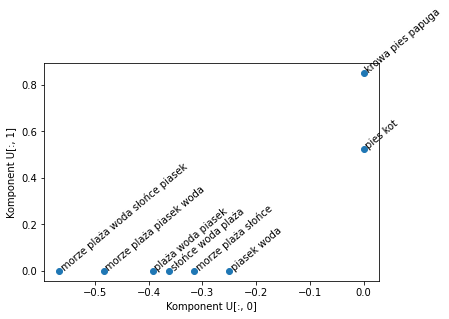

In [101]:
plt.scatter(latent_vars[:, 0], latent_vars[:, 1])
for i in range(latent_vars.shape[0]):
    plt.annotate(s=documents[i],
                xy=(latent_vars[i, 0], latent_vars[i, 1]),
                rotation=40)
    
plt.xlabel('Komponent U[:, 0]')
plt.ylabel('Komponent U[:, 1]')

In [102]:
cv.get_feature_names()

['kot',
 'krowa',
 'morze',
 'papuga',
 'piasek',
 'pies',
 'plaża',
 'słońce',
 'woda']

In [103]:
U[:, 0]

array([ 0.  ,  0.  , -0.35,  0.  , -0.44,  0.  , -0.55, -0.32, -0.53])

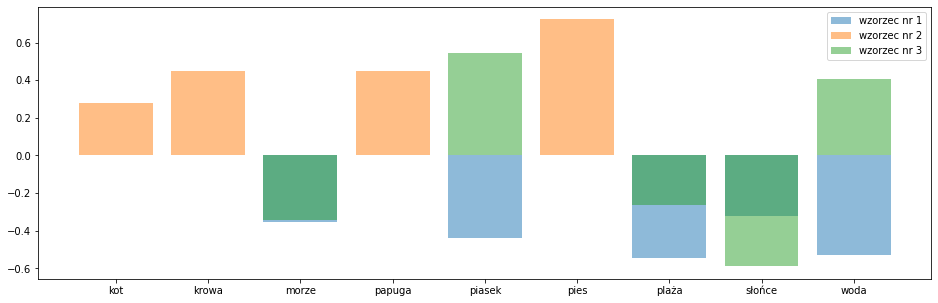

In [106]:
plt.figure(figsize=(16, 5))
plt.bar(cv.get_feature_names(), U[:, 0], label='wzorzec nr 1', alpha= 0.5)
plt.bar(cv.get_feature_names(), U[:, 1], label='wzorzec nr 2', alpha= 0.5)
plt.bar(cv.get_feature_names(), U[:, 2], label='wzorzec nr 3', alpha= 0.5)
plt.legend()

INTERPRETACJA WZORCÓW:

1. SŁOWA ZWIĄZANE TYLKO Z WAKACJAMI
2. SŁOWA ZWIĄZANE TYLKO ZE ZWIERZĘTAMI
3. WŚRÓD SŁÓW ZWIĄZANYCH Z WAKACJAMI ROZRÓŻNIENIE PIASKU I WODY OD RESZTY


In [107]:
latent_vars

array([[-0.57, -0.  ],
       [-0.48,  0.  ],
       [-0.32, -0.  ],
       [-0.39, -0.  ],
       [-0.36,  0.  ],
       [-0.25,  0.  ],
       [ 0.  ,  0.85],
       [ 0.  ,  0.53]])

### Pytanie: jak wyreprezentować przychodzące zapytanie w naszej przestrzeni V?

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

In [110]:
new_doc = ['morze i słońce']
new_doc = cv.transform(new_doc).todense().A.T
new_doc

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [ ]:
query = np.matmul(np.linalg.inv())

### SVD w sklearn.

Oczywiście w sklearn istnieje gotwe narzędzie do robienia rozkładu sklearn i działa ona w konwencji sklearna - mamy gotowy obiekt, który można dopasować do danych i zrobić wszystko co potrzebujemy:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>

<br>

# PCA


<img src="Grafika/pca1.png" width="740">

<img src="Grafika/pca2.png" width="400">

Źródło: https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0

<img src="Grafika/PCA.png" width="800">

Źródło: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

### Uwaga na skalę zmiennych!

### Zadanie. Rozważmy zbiór ryb. Ile wymiarów wystarczy, żeby je dobrze wyreprezentować?

C:\Users\Waldemar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


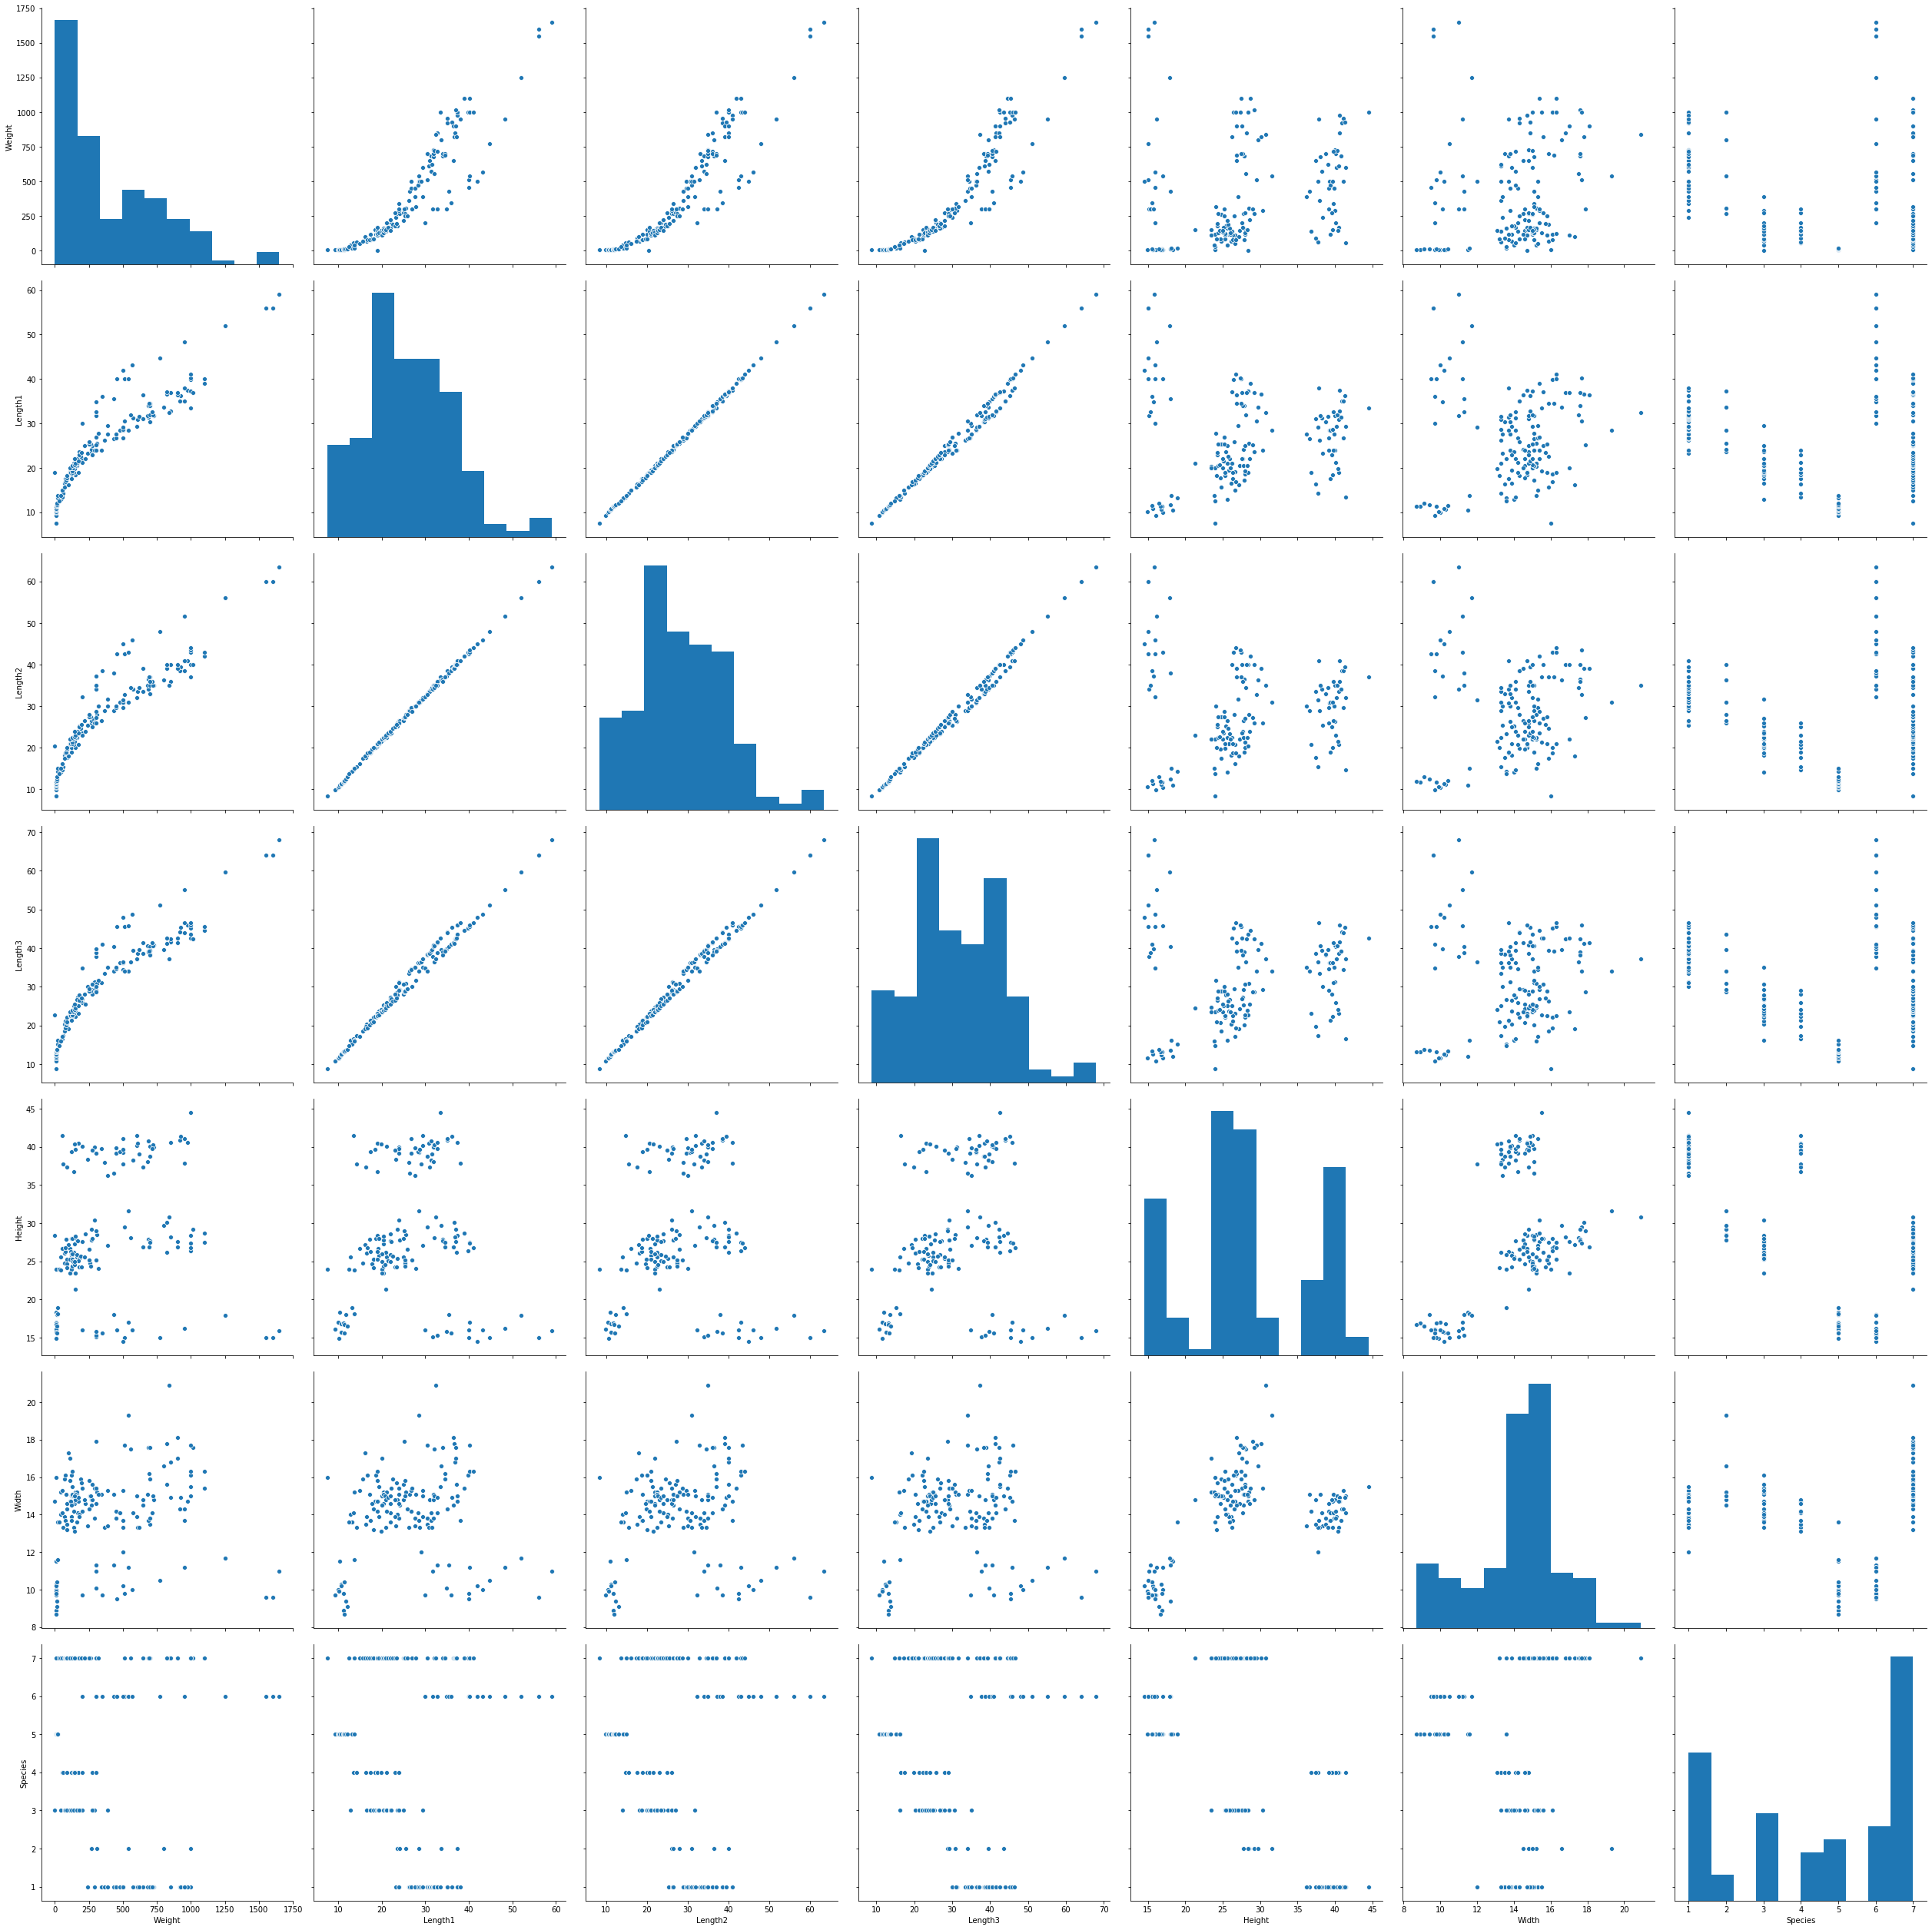

In [80]:
import pandas as pd
samples = pd.read_csv("Dane/fish.csv", sep=";", decimal=",")

### Zadanie:

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

Przygotowanie danych wspólnie - model i interpretacja - zadanie samodzielne.

In [4]:
import pandas as pd
food = pd.read_csv("Dane/food.txt",delimiter=" ",comment="#")
food.head()

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209


## Zadanie 2: przeanalizować charakterystyki miast przy użyciu PCA - zinterpretować składowe

In [101]:
miasta = pd.read_csv("Dane/Miasta.txt",sep="\t+")
miasta.head()

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Work,Price,Salary
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


### Zadanie 

Inne miasta - przeanalizować miasta przy użyciu PCA: ile głównych składowych, zinterpretować je, zidentyfikować wyróżniające się miasta


2. http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/assignment2.html

In [105]:
dane = pd.read_csv("Dane/places.txt",sep="\s+",header=0)
dane = dane.iloc[:,range(9)]
dane.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


## Zastosowanie PCA do redukcji wymiaru dla regresji liniowej

*Ciekawostka: połączenie regresji liniowej z PCA jest nazywane PCR*

 Dane longley: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [110]:
import pandas as pd
df = pd.read_csv('Dane/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


### Zadanie

Użyć PCA do redukcji wymiaru dla modelu regresji na danych yarn (p>n) i porównać z regresją lasso.

In [121]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

In [122]:
import pandas as pd

df = pd.read_csv("Dane/yarn.txt",sep=" ",index_col=0)
print(df.shape)
df.head().iloc[:,-5:]

(28, 270)


,V266,V267,V268,V269,V270
1,0.29440,0.29432,0.29443,100.00,1
2,0.30031,0.30030,0.30041,80.22,1
3,0.32464,0.32460,0.32474,79.49,1
4,0.30928,0.30932,0.30947,60.80,1
5,0.31021,0.31026,0.31049,59.97,1


### Zadanie domowe

Zadanie klasyfikacji "spam or ham"z pierwszych zajęć - przetestować pipeline z uwzględnieniem redukcji wymiaru przy użyciu SVD.

### Źródła i materiały


http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py


http://www.ams.org/samplings/feature-column/fcarc-svd

https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/

https://alyssaq.github.io/2015/singular-value-decomposition-visualisation/
 
Przykład obrazujący dlaczego PCA może zaszkodzić:

https://blog.drskippy.com/2012/05/14/dimension-reduction-for-machine-learning-simple-example-of-svd-pca-pathology/